## Understanding image data

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow as tf
from tensorflow import keras

%matplotlib inline

### 1. Loading an image

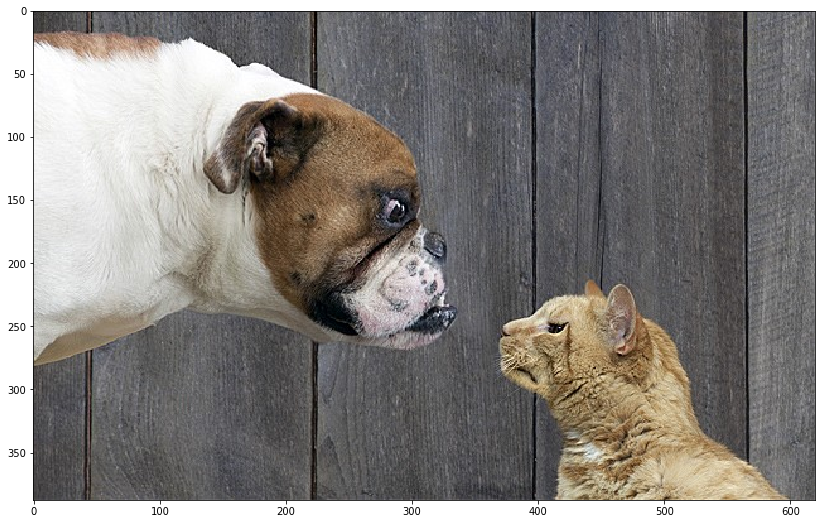

In [3]:
image_path = 'dogs_vs_cats.jpg'
img = cv2.imread(image_path, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(16, 9))
plt.imshow(img)

Checking the data type of the image and its representation

In [5]:
print(type(img))
print(img.shape)

<class 'numpy.ndarray'>
(388, 620, 3)


The pixel values should be in range of 0 (black), 255 (white). Let's verify it!

In [8]:
print(f'Min pixel value: {np.min(img)}')
print(f'Max pixel value: {np.max(img)}')

Min pixel value: 0
Max pixel value: 255


### 2. Downloading Cats and Dogs image dataset

We will download a filtered version of Kaggle's Dogs vs Cats dataset. Then store the downloaded zip file

In [11]:
zip_file = tf.keras.utils.get_file(origin="https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip",
                                   fname="cats_and_dogs_filtered.zip", extract=True)
base_dir, _ = os.path.splitext(zip_file)

68608000/68606236 [==============================] - 12s 0us/step


In [15]:
print(zip_file)
print(base_dir)
print(_)

/home/ubuntu/.keras/datasets/cats_and_dogs_filtered.zip
/home/ubuntu/.keras/datasets/cats_and_dogs_filtered
.zip


In [19]:
for x in os.walk(base_dir):
    print(x[0])

/home/ubuntu/.keras/datasets/cats_and_dogs_filtered
/home/ubuntu/.keras/datasets/cats_and_dogs_filtered/train
/home/ubuntu/.keras/datasets/cats_and_dogs_filtered/train/cats
/home/ubuntu/.keras/datasets/cats_and_dogs_filtered/train/dogs
/home/ubuntu/.keras/datasets/cats_and_dogs_filtered/validation
/home/ubuntu/.keras/datasets/cats_and_dogs_filtered/validation/cats
/home/ubuntu/.keras/datasets/cats_and_dogs_filtered/validation/dogs


In [20]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
print ('Total training cat images:', len(os.listdir(train_cats_dir)))

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
print ('Total training dog images:', len(os.listdir(train_dogs_dir)))

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
print ('Total validation cat images:', len(os.listdir(validation_cats_dir)))

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
print ('Total validation dog images:', len(os.listdir(validation_dogs_dir)))

Total training cat images: 1000
Total training dog images: 1000
Total validation cat images: 500
Total validation dog images: 500


### 3. Performing image pre-processing and data augmentation

We will use ImageDataGenerator to rescale the images.

To create the train generator, specify where the train dataset directory, image size, batch size and binary classification mode.

The validation generator is created the same way.

In [39]:
image_size = 160 # All images will be resized to 160x160
batch_size = 32

# Rescale all images by 1./255 and apply image augmentation
train_datagen = keras.preprocessing.image.ImageDataGenerator(
                rotation_range=45,
                width_shift_range=0.2,
                height_shift_range=0.2,
                horizontal_flip=True,
                vertical_flip=True,
                rescale=1./255)

validation_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
                train_dir,  # Source directory for the training images
                target_size=(image_size, image_size),
                batch_size=batch_size,
                # Since we use binary_crossentropy loss, we need binary labels
                class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = validation_datagen.flow_from_directory(
                validation_dir, # Source directory for the validation images
                target_size=(image_size, image_size),
                batch_size=batch_size,
                class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [40]:
for img in train_generator:
    print(type(img[0]))
    print(img[0].shape)
    print(type(img[1]))
    print(img[1])
    break

<class 'numpy.ndarray'>
(32, 160, 160, 3)
<class 'numpy.ndarray'>
[ 0.  0.  0.  1.  0.  1.  0.  1.  1.  0.  0.  1.  1.  1.  0.  0.  0.  1.
  1.  1.  0.  1.  0.  0.  0.  0.  1.  1.  1.  1.  0.  0.]


Here we have only 2 classes (i.e. cats and dogs) for more than 2 classes we need to convert our labels to one hot encoded format.

Below example converts 11 to one hot encoded format.

In [43]:
a = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
keras.utils.to_categorical(a)

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]], dtype=float32)

### 4. Visualizing processed images

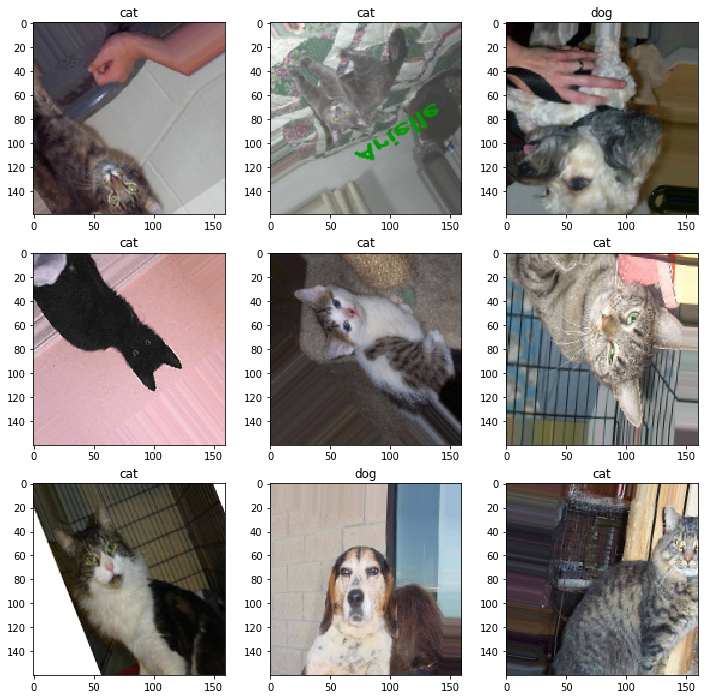

In [42]:
classes = ['cat', 'dog']
plt.figure(figsize=(12, 12))
for batch in train_generator:
    for i in range(9):
        image, label = batch[0][i], batch[1][i]
        plt.subplot(3,3,i+1)
        plt.imshow(image)
        plt.title(classes[int(label)])
        plt.grid(False)
    break

We can use OpenCV to perform the same image transformations as above. Refer [this](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_table_of_contents_imgproc/py_table_of_contents_imgproc.html) link if you want to add custom image processing to your pipeline.

Further reading:
* https://www.kaggle.com/bkamphaus/exploratory-image-analysis